In [ ]:
"""QUESTION 1"""

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [144]:
fever = pd.read_csv('Fever.csv')

In [145]:
fever.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [146]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [147]:
fever.A = pd.Categorical(fever.A)
fever.B = pd.Categorical(fever.A)
fever.Volunteer = pd.Categorical(fever.Volunteer)

In [148]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null category
Volunteer    36 non-null category
Relief       36 non-null float64
dtypes: category(3), float64(1)
memory usage: 876.0 bytes


In [149]:
fever.describe(include = 'all')

A     B  Volunteer     Relief
count   36.0  36.0       36.0  36.000000
unique   3.0   3.0        4.0        NaN
top      3.0   3.0        4.0        NaN
freq    12.0  12.0        9.0        NaN
mean     NaN   NaN        NaN   7.183333
std      NaN   NaN        NaN   3.272090
min      NaN   NaN        NaN   2.300000
25%      NaN   NaN        NaN   4.675000
50%      NaN   NaN        NaN   6.000000
75%      NaN   NaN        NaN   9.325000
max      NaN   NaN        NaN  13.500000

In [9]:
fever.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [55]:
fever['Volunteer'].value_counts(), fever['A'].value_counts(), fever['B'].value_counts()

(4    9
 3    9
 2    9
 1    9
 Name: Volunteer, dtype: int64, 3    12
 2    12
 1    12
 Name: A, dtype: int64, 3    12
 2    12
 1    12
 Name: B, dtype: int64)

In [78]:
fever.groupby(by = 'A')['Relief'].mean()

A
1    3.883333
2    7.833333
3    9.833333
Name: Relief, dtype: float64

In [79]:
fever.groupby(by = 'B')['Relief'].mean()

B
1    3.883333
2    7.833333
3    9.833333
Name: Relief, dtype: float64

In [81]:
fever.groupby(by = ['A','Volunteer'])['Relief'].mean()

A  Volunteer
1  1            3.933333
   2            3.800000
   3            3.866667
   4            3.933333
2  1            7.933333
   2            7.866667
   3            7.633333
   4            7.900000
3  1            9.833333
   2            9.733333
   3            9.933333
   4            9.833333
Name: Relief, dtype: float64

In [82]:
fever.groupby(by = ['B','Volunteer'])['Relief'].mean()

B  Volunteer
1  1            3.933333
   2            3.800000
   3            3.866667
   4            3.933333
2  1            7.933333
   2            7.866667
   3            7.633333
   4            7.900000
3  1            9.833333
   2            9.733333
   3            9.933333
   4            9.833333
Name: Relief, dtype: float64

In [23]:
# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. 
# State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [150]:
formula = 'Relief ~ C(A)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [151]:
# 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. 
# State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [152]:
formula = 'Relief ~ C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(B)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [42]:
# 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
# What is an interaction between two treatments?

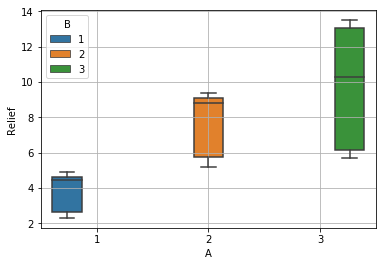

In [69]:
sns.boxplot(x="A", y="Relief", data=fever,hue='B')
plt.grid()
plt.show()

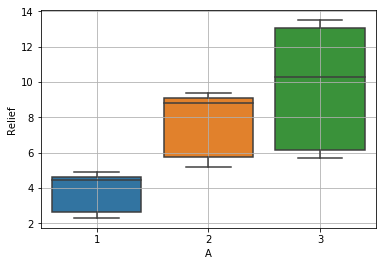

In [74]:
sns.boxplot(x="A", y="Relief", data=fever)
plt.grid()
plt.show()

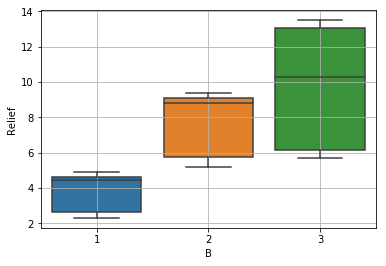

In [75]:
sns.boxplot(x="B", y="Relief", data=fever)
plt.grid()
plt.show()

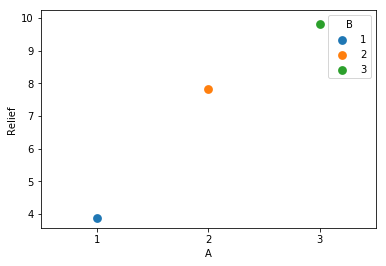

In [60]:
sns.pointplot(x='A', y='Relief', data=fever, ci=None, hue = 'B')

In [ ]:
# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results

In [62]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

             df      sum_sq     mean_sq          F        PR(>F)
C(A)        2.0  220.020000  110.010000  23.465387  4.578242e-07
C(B)        2.0    3.797820    1.898910   0.405042  6.702193e-01
C(A):C(B)   4.0    4.918505    1.229626   0.262282  9.000112e-01
Residual   33.0  154.710000    4.688182        NaN           NaN


In [153]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Relief   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     23.47
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           4.58e-07
Time:                        22:06:41   Log-Likelihood:                -77.326
No. Observations:                  36   AIC:                             160.7
Df Residuals:                      33   BIC:                             165.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8833      0.625      6.213      0.000       2.612       5.155
C(B)[T.2]      3.9500      0.884      4.469      0.000       2.152       5.748
C(B)[T.3]      5.9500      0.884      6.731      0.000       4.152       7.748
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.532
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.267
Skew:                          -0.369   Prob(JB):                        0.531
Kurtosis:                       2.452   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
formula = 'Relief ~ C(A) + C(B) + C(Volunteer) + C(A):C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

                df      sum_sq     mean_sq          F    PR(>F)
C(A)           2.0  220.020000  110.010000  21.342133  0.000002
C(B)           2.0    3.797820    1.898910   0.368392  0.694932
C(Volunteer)   3.0    0.093753    0.031251   0.006063  0.999335
C(A):C(B)      4.0    3.900723    0.975181   0.189187  0.942186
Residual      30.0  154.637778    5.154593        NaN       NaN


In [65]:
# 1.6) Mention the business implications of performing ANOVA for this particular case study.

In [87]:
##Tukeyhsd
mc=MultiComparison(fever['Relief'],groups = fever['A'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2      3.95    1.7814 6.1186  True 
  1      3      5.95    3.7814 8.1186  True 
  2      3      2.0    -0.1686 4.1686 False 
--------------------------------------------


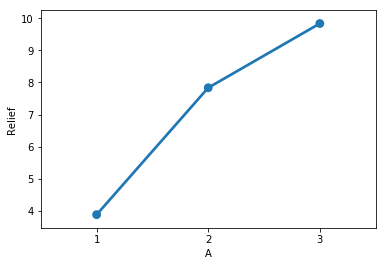

In [58]:
sns.pointplot(x='A', y='Relief', data=fever, ci=None)

In [67]:
mc=MultiComparison(fever['Relief'],fever['B'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2      3.95    1.7814 6.1186  True 
  1      3      5.95    3.7814 8.1186  True 
  2      3      2.0    -0.1686 4.1686 False 
--------------------------------------------


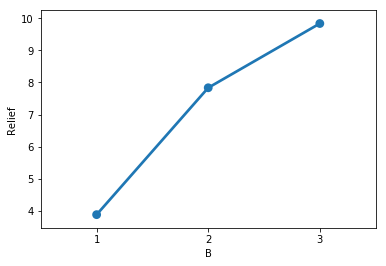

In [59]:
sns.pointplot(x='B', y='Relief', data=fever, ci=None)

In [ ]:
"""QUESTION 2"""

In [6]:
data = pd.read_csv("Education+-+Post+12th+Standard.csv")
data.head(10)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   
5             Albertson College   587     479     158         38         62   
6       Albertus Magnus College   353     340     103         17         45   
7                Albion College  1899    1720     489         37         68   
8              Albright College  1038     839     227         30         63   
9     Alderson-Broaddus College   582     498     172         21         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   
5          678           41     13500        3335    500       675   67   
6          416          230     13290        5720    500      1500   90   
7         1594           32     13868        4826    450       850   89   
8          973          306     15595        4400    300       500   79   
9          799           78     10468        3380    660      1800   40   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15  
5        73        9.4           11    9727         55  
6        93       11.5           26    8861         63  
7       100       13.7           37   11487         73  
8        84       11.3           23   11644         80  
9        41       11.5           15    8991         52

In [7]:
data.shape

(777, 18)

In [42]:
data.Names.nunique()

777

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB


In [9]:
data.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [10]:
data.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [13]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [7]:
#Dropping Names field
data_df = data.drop('Names',axis=1)

In [35]:
data_df.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0   1660    1232     721         23         52         2885          537   
1   2186    1924     512         16         29         2683         1227   
2   1428    1097     336         22         50         1036           99   
3    417     349     137         60         89          510           63   
4    193     146      55         16         44          249          869   
5    587     479     158         38         62          678           41   
6    353     340     103         17         45          416          230   
7   1899    1720     489         37         68         1594           32   
8   1038     839     227         30         63          973          306   
9    582     498     172         21         44          799           78   
10  1732    1425     472         37         75         1830          110   
11  2652    1900     484         44         77         1707           44   
12  1179     780     290         38         64         1130          638   
13  1267    1080     385         44         73         1306           28   
14   494     313     157         23         46         1317         1235   
15  1420    1093     220          9         22         1018          287   
16  4302     992     418         83         96         1593            5   
17  1216     908     423         19         40         1819          281   
18  1130     704     322         14         23         1586          326   
19  3540    2001    1016         24         54         4190         1512   

    Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0       7440        3300    450      2200   70        78       18.1   
1      12280        6450    750      1500   29        30       12.2   
2      11250        3750    400      1165   53        66       12.9   
3      12960        5450    450       875   92        97        7.7   
4       7560        4120    800      1500   76        72       11.9   
5      13500        3335    500       675   67        73        9.4   
6      13290        5720    500      1500   90        93       11.5   
7      13868        4826    450       850   89       100       13.7   
8      15595        4400    300       500   79        84       11.3   
9      10468        3380    660      1800   40        41       11.5   
10     16548        5406    500       600   82        88       11.3   
11     17080        4440    400       600   73        91        9.9   
12      9690        4785    600      1000   60        84       13.3   
13     12572        4552    400       400   79        87       15.3   
14      8352        3640    650      2449   36        69       11.1   
15      8700        4780    450      1400   78        84       14.7   
16     19760        5300    660      1598   93        98        8.4   
17     10100        3520    550      1100   48        61       12.1   
18      9996        3090    900      1320   62        66       11.5   
19      5130        3592    500      2000   60        62       23.1   

    perc.alumni  Expend  Grad.Rate  
0            12    7041         60  
1            16   10527         56  
2            30    8735         54  
3            37   19016         59  
4             2   10922         15  
5            11    9727         55  
6            26    8861         63  
7            37   11487         73  
8            23   11644         80  
9            15    8991         52  
10           31   10932         73  
11           41   11711         76  
12           21    7940         74  
13           32    9305         68  
14           26    8127         55  
15           19    7355         69  
16           63   21424        100  
17           14    7994         59  
18           18   10908         46  
19            5    4010         34

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


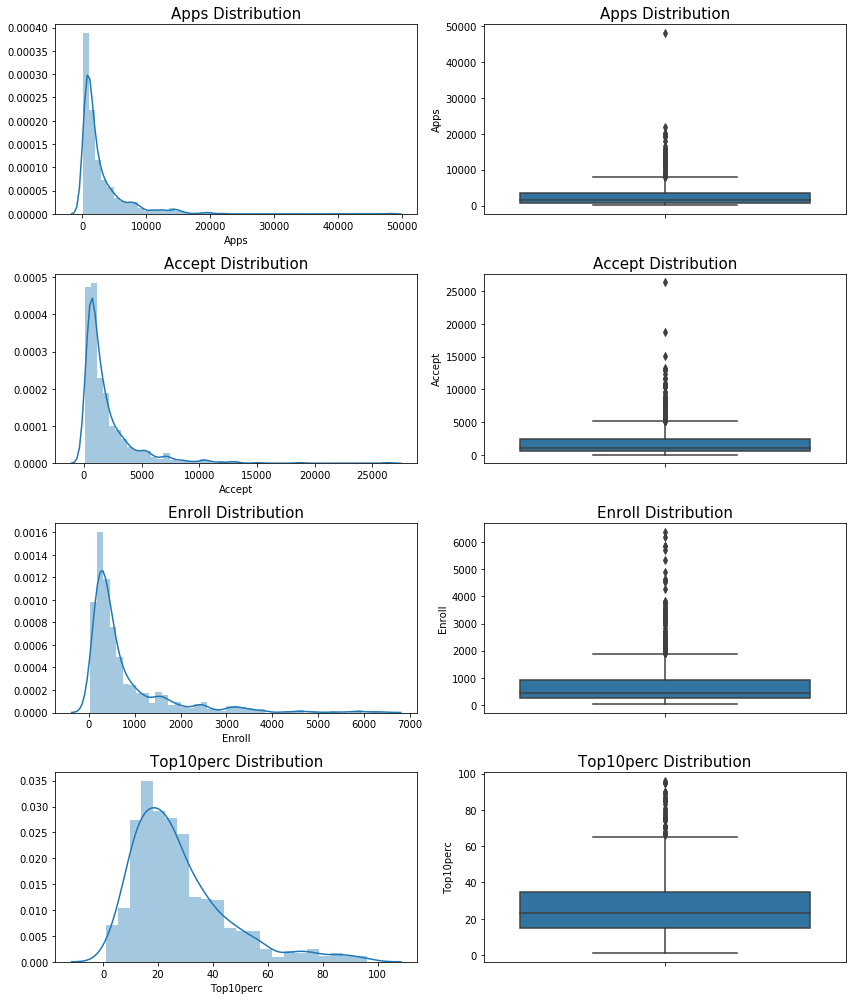

In [126]:
# 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. 
# The inferences drawn from this should be properly documented.
## Univariate except name column
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data_df['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=15)
a = sns.boxplot(data_df['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(data_df['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=15)

a = sns.boxplot(data_df['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=15)

a = sns.distplot(data_df['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=15)

a = sns.boxplot(data_df['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=15)


a = sns.distplot(data_df['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.boxplot(data_df['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=15)

plt.tight_layout()
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


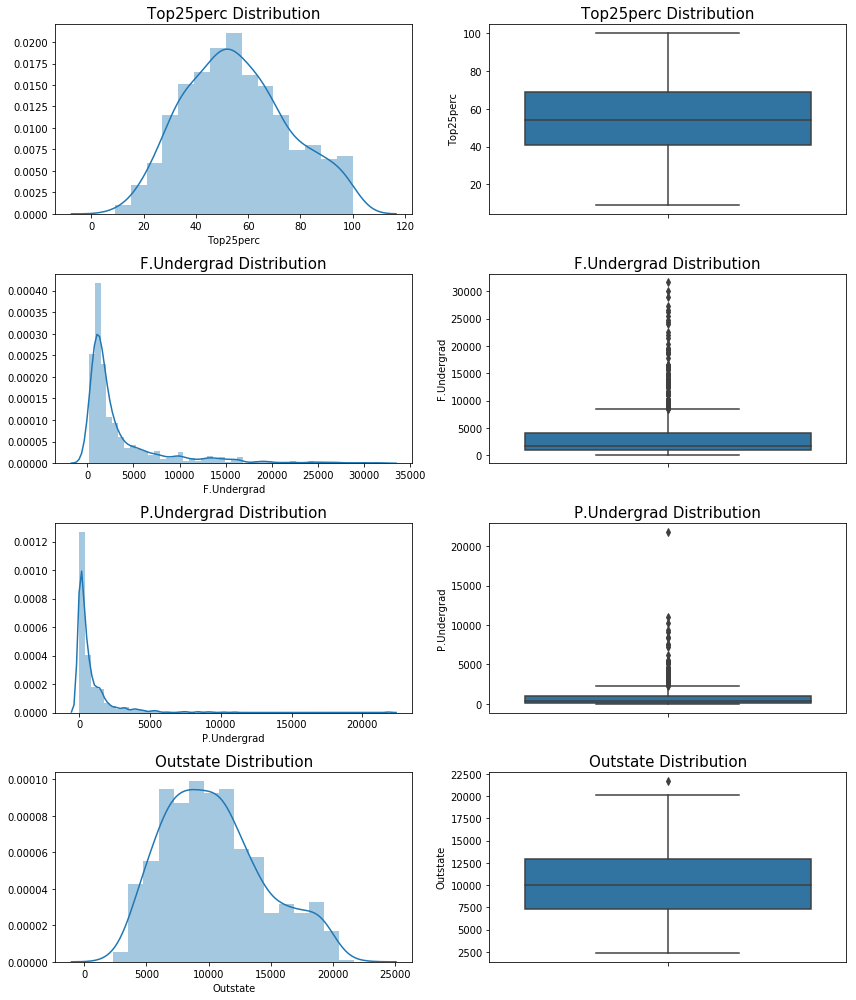

In [127]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data_df['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=15)
a = sns.boxplot(data_df['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(data_df['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.boxplot(data_df['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.distplot(data_df['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=15)

a = sns.boxplot(data_df['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=15)


a = sns.distplot(data_df['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=15)

a = sns.boxplot(data_df['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=15)

plt.tight_layout()
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


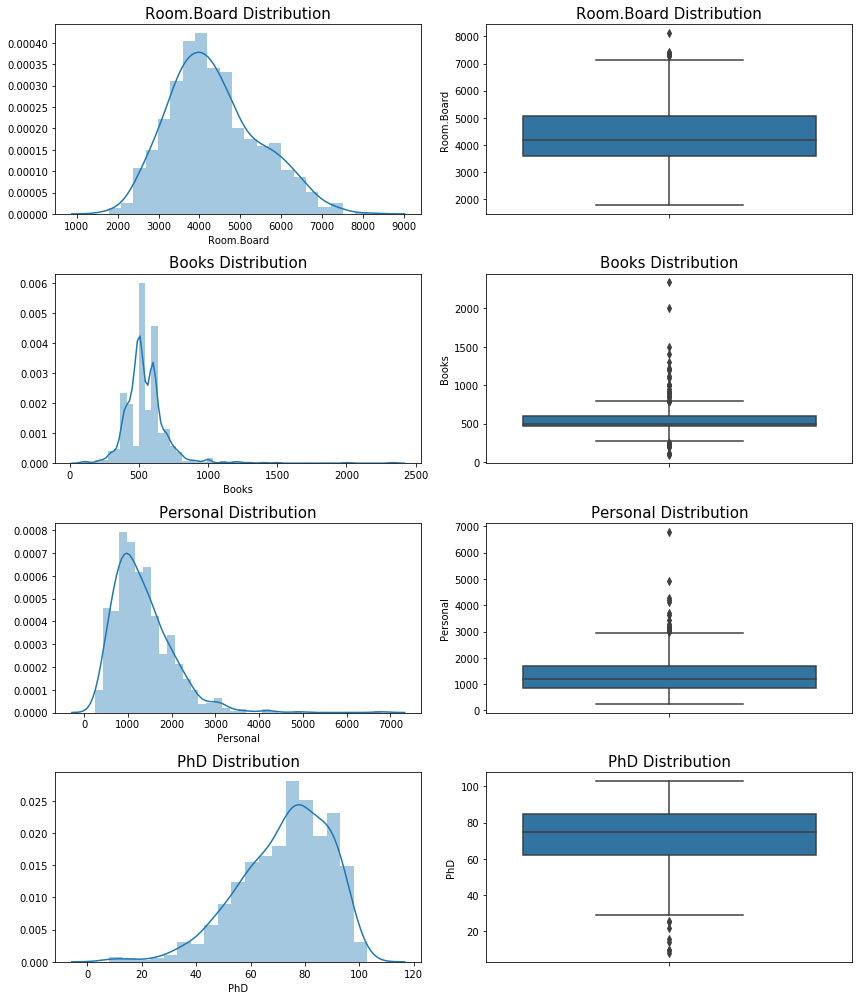

In [128]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data_df['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=15)
a = sns.boxplot(data_df['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(data_df['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=15)

a = sns.boxplot(data_df['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=15)

a = sns.distplot(data_df['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=15)

a = sns.boxplot(data_df['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=15)


a = sns.distplot(data_df['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=15)

a = sns.boxplot(data_df['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=15)

plt.tight_layout()
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

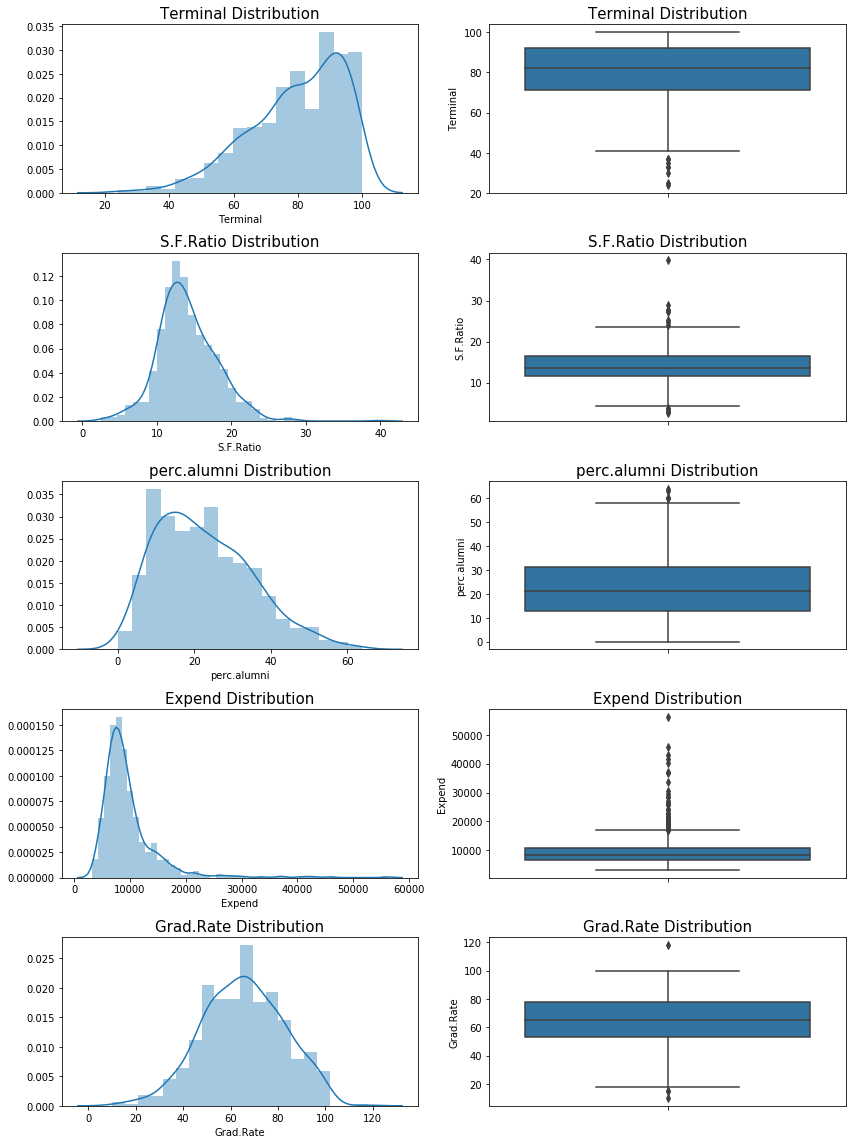

In [139]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 16)
a = sns.distplot(data_df['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=15)
a = sns.boxplot(data_df['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(data_df['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.boxplot(data_df['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.distplot(data_df['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.boxplot(data_df['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=15)


a = sns.distplot(data_df['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=15)

a = sns.boxplot(data_df['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=15)

a = sns.distplot(data_df['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=15)

a = sns.boxplot(data_df['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=15)

plt.tight_layout()
plt.show()

In [15]:
#Bivariate Analysis
# Check for correlation of variable
data_df.corr(method='pearson')

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

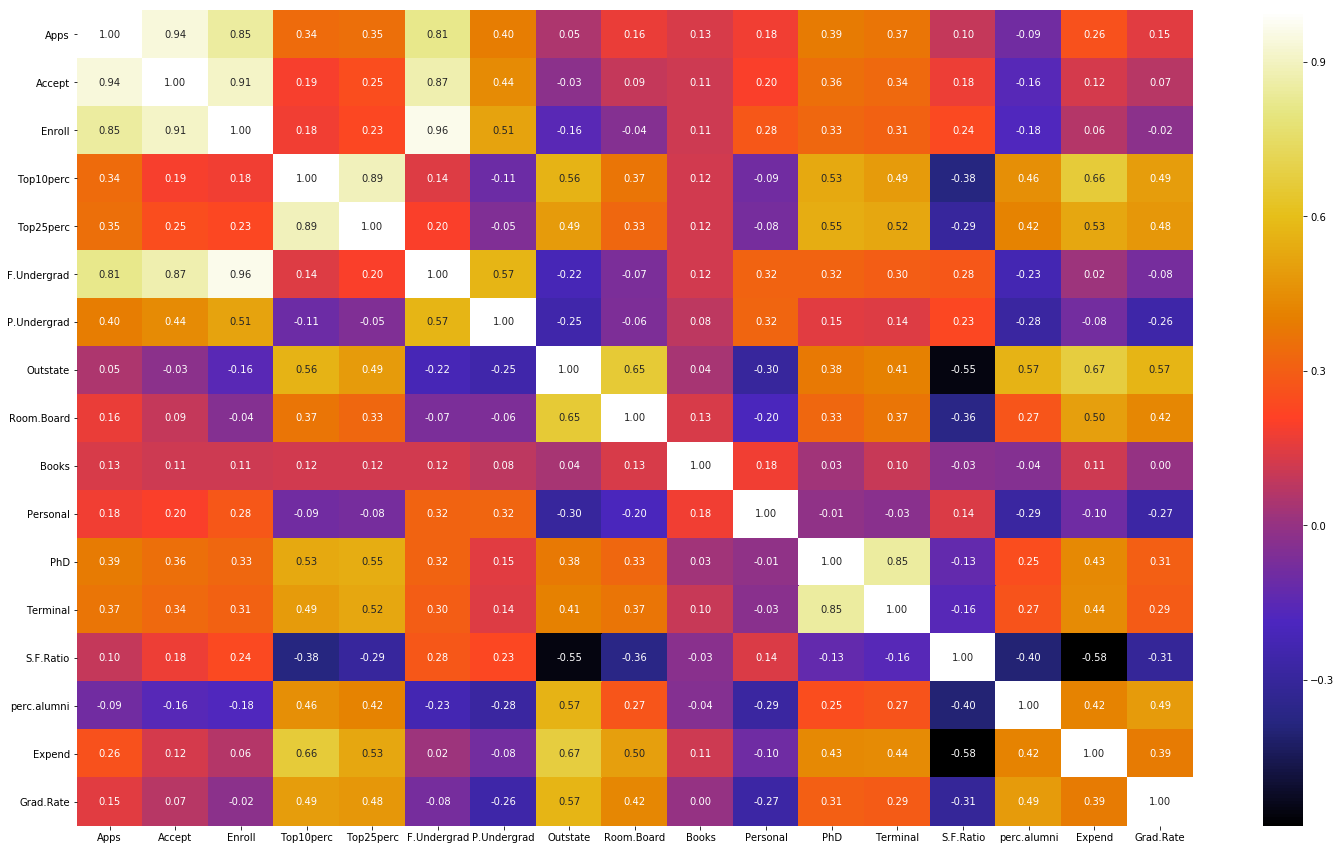

In [146]:
plt.subplots(figsize=(25,15))
sns.heatmap(data_df.corr(), annot=True,fmt='.2f',cmap='CMRmap')
plt.show()

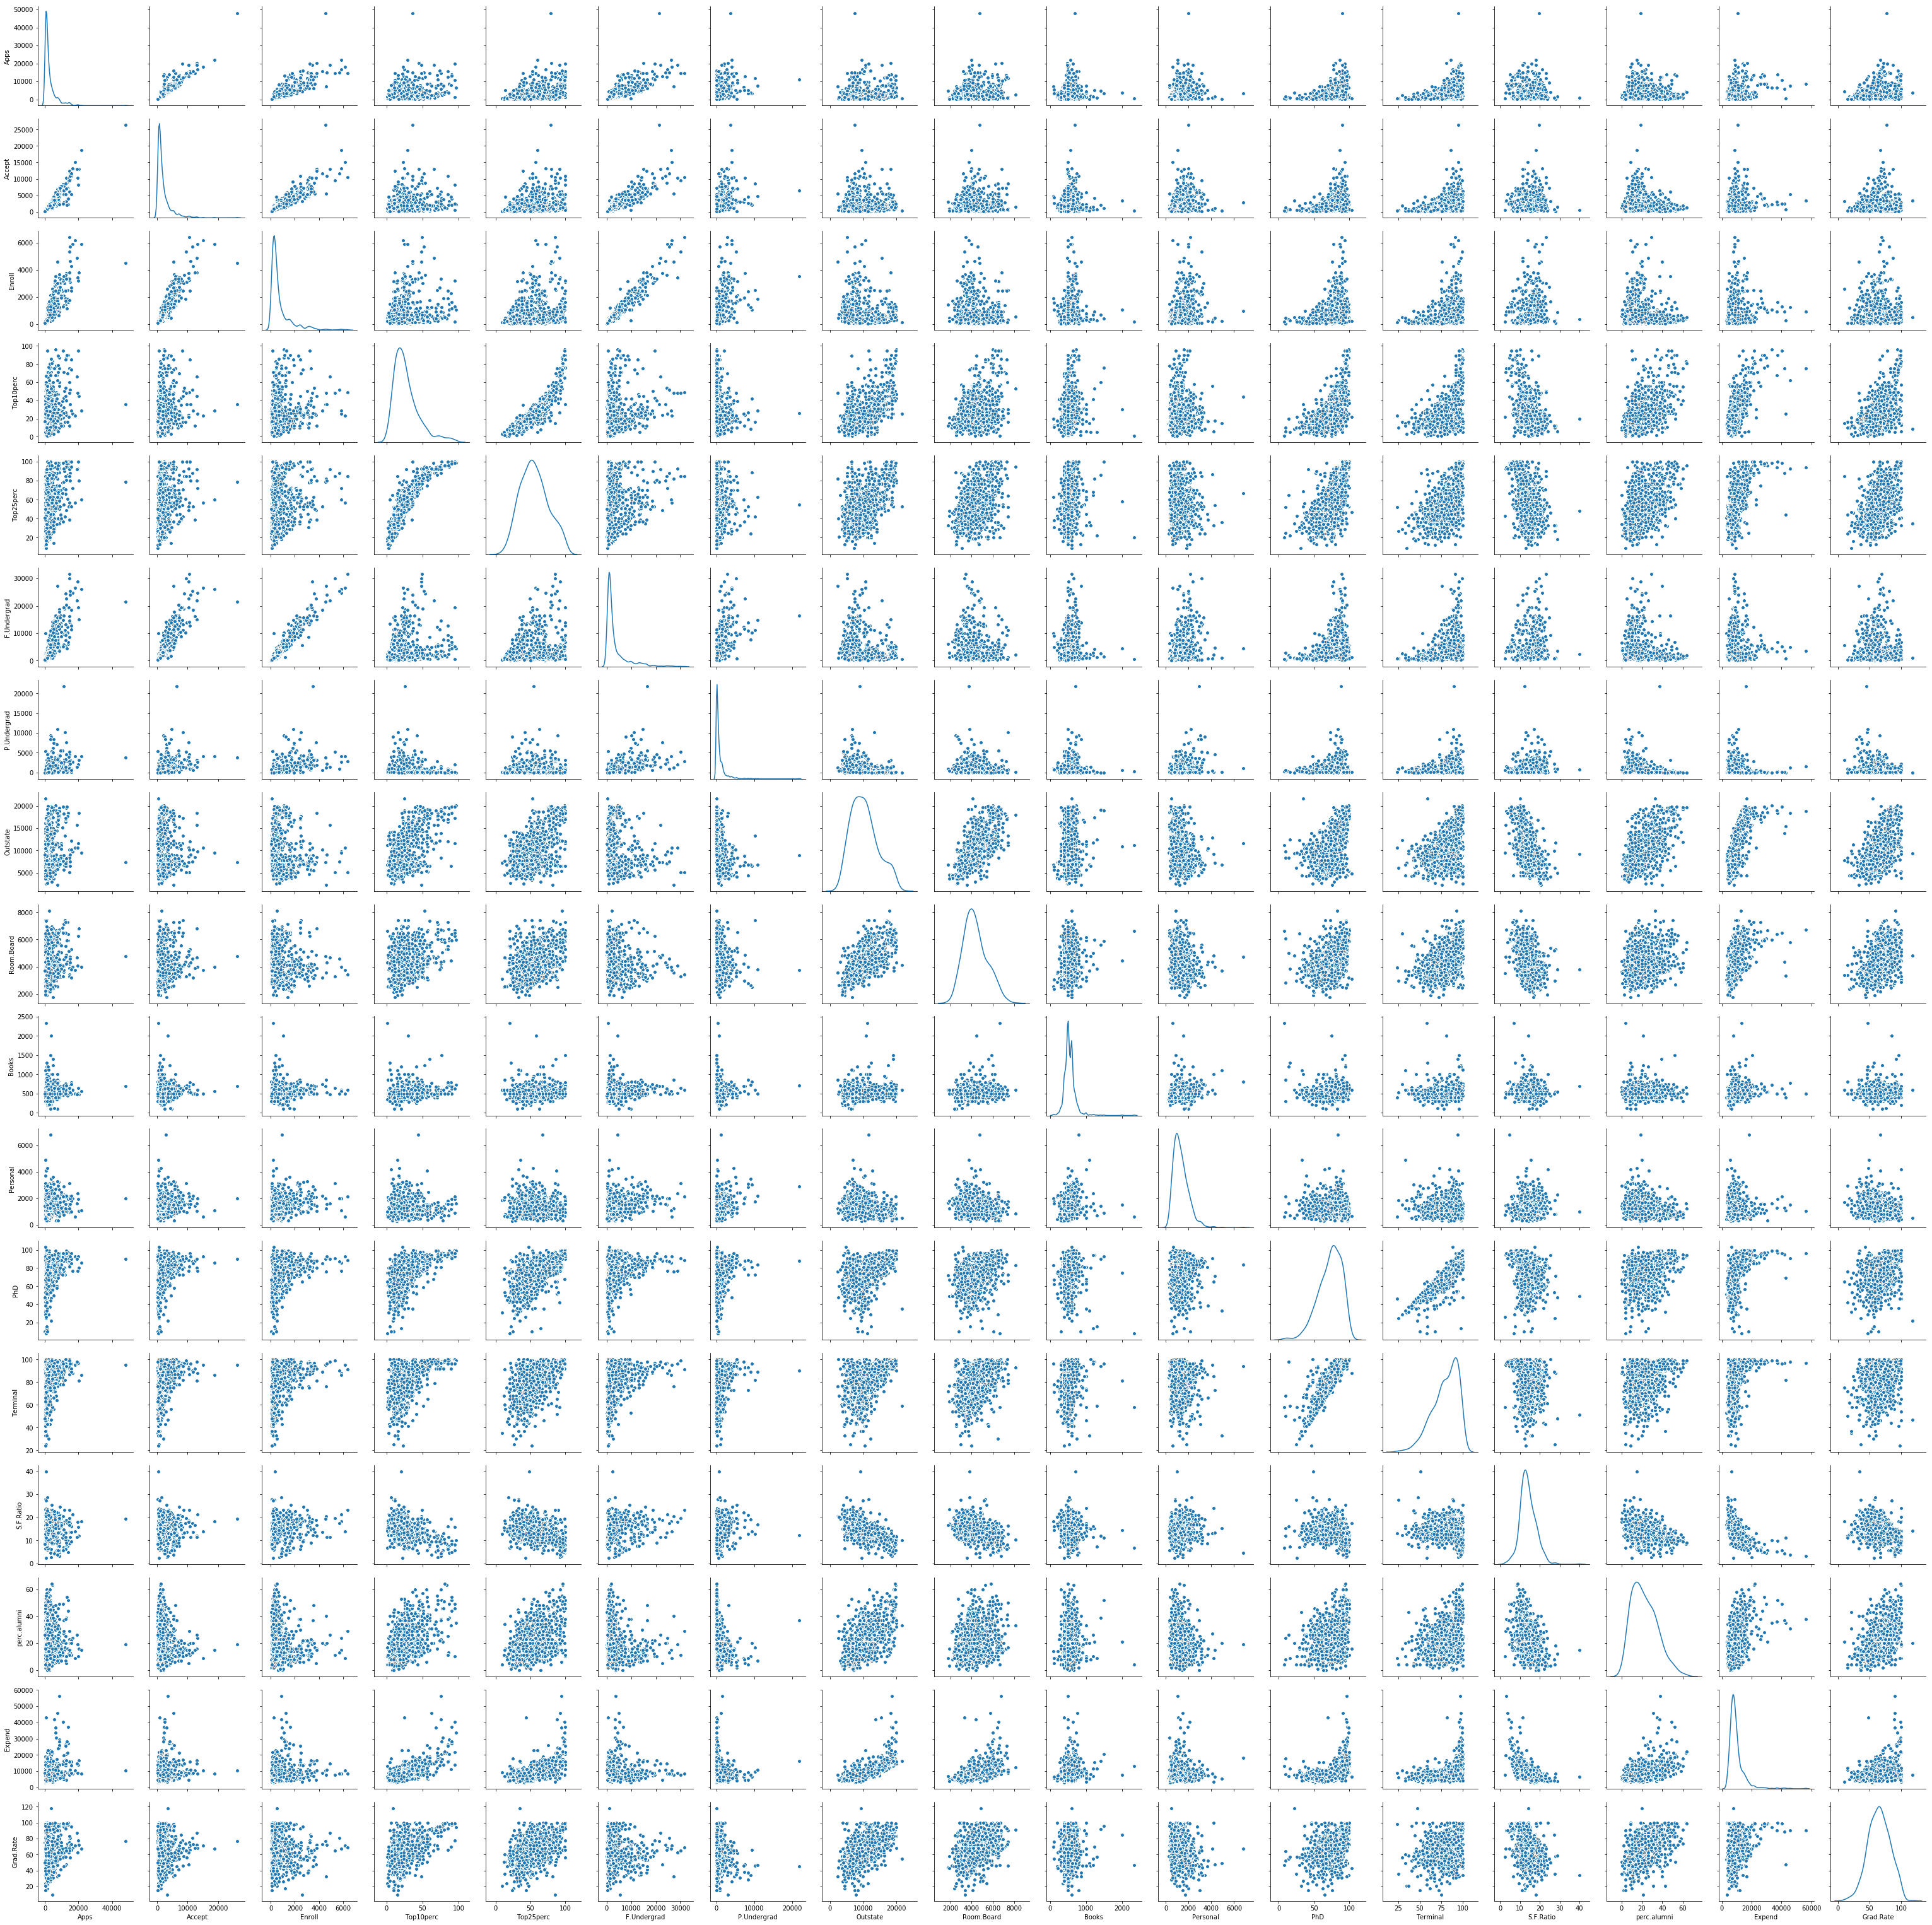

In [147]:
sns.pairplot(data_df,diag_kind='kde')
plt.show()

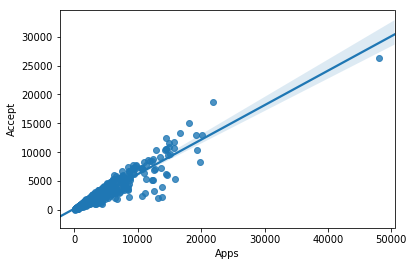

In [18]:
sns.regplot(x='Apps',y='Accept', data=data_df)

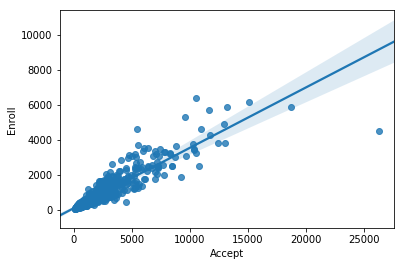

In [19]:
sns.regplot(x='Accept',y='Enroll', data=data_df)

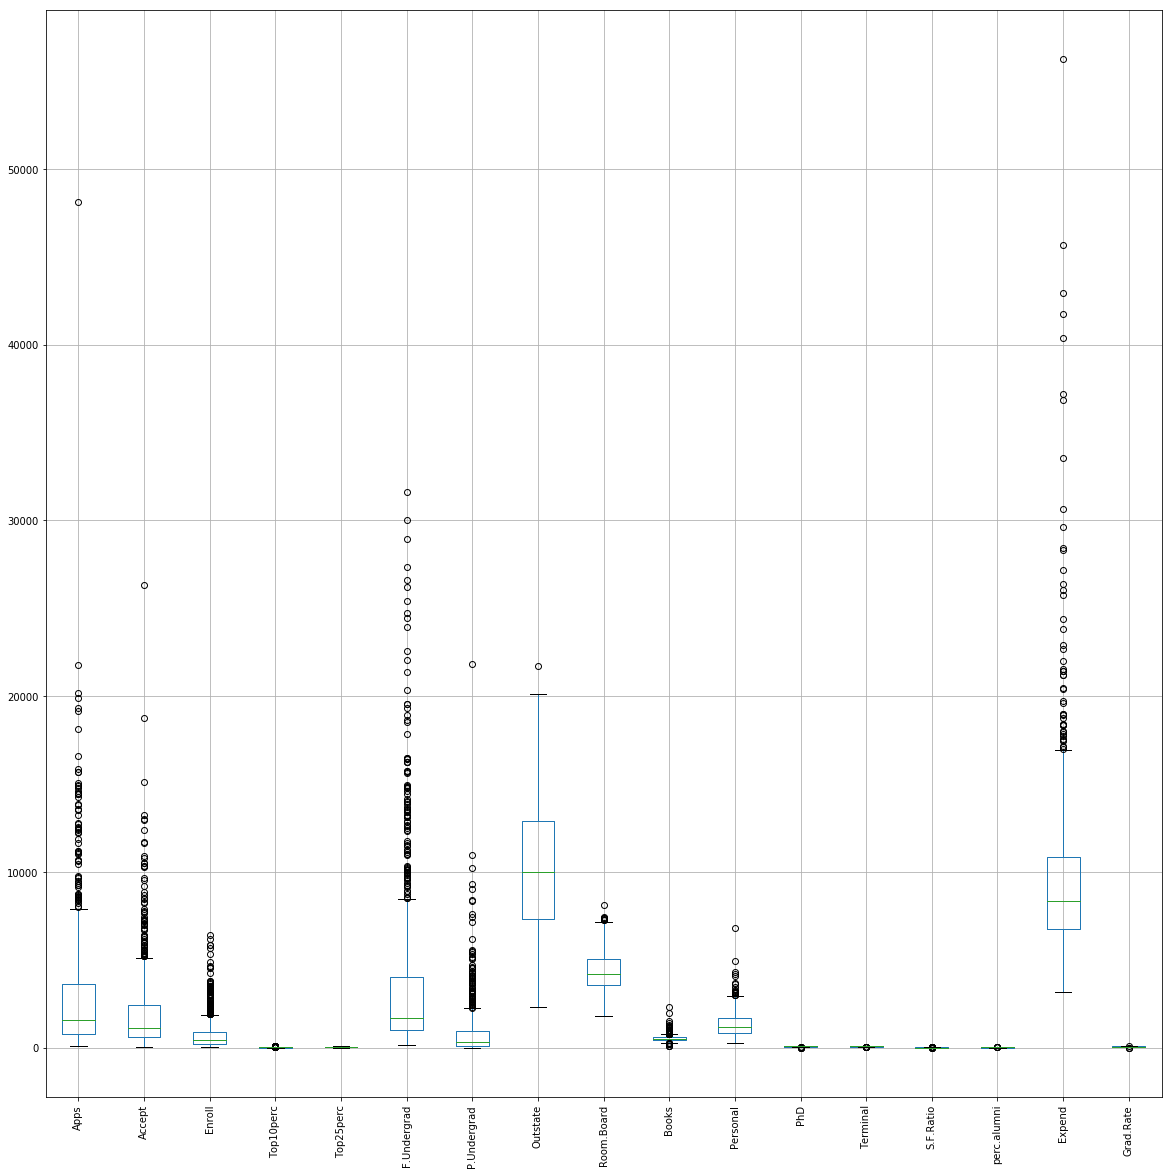

In [68]:
data_df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [79]:
data_df.sort_values(by = 'Apps', ascending = False).head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
483  48094   26330    4520         36         79        21401         3712   
461  21804   18744    5874         29         60        26213         4065   
59   20192   13007    3810         45         80        14971         3113   
605  19873    8252    3215         95        100        19532         2061   
445  19315   10344    3450         48         93        28938         2025   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
483      7410        4748    690      2009   90        95       19.5   
461      9556        3990    570      1060   86        86       18.2   
59      18420        6810    475      1025   80        81       11.9   
605     11648        6246    636      1933   93        97       15.8   
445     10645        4060    512      2394   77        96       18.1   

     perc.alumni  Expend  Grad.Rate  
483           19   10474         77  
461           15    8604         67  
59            16   16836         72  
605           10   13919         78  
445           19    8992         63

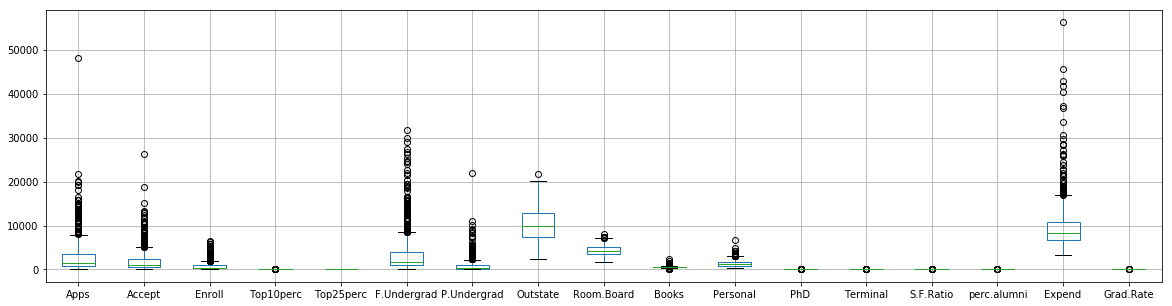

In [93]:
data_df.boxplot(figsize=(20,5))

In [80]:
#Outlier treatment by removing quantites above and below IQR BEFORE SCALING
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)
IQR = Q3 - Q1
data_df_IQR_remove = data_df[~((data_df < (Q1 - 1.5 * IQR)) |(data_df > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
data_df_IQR_remove.shape, data_df.shape

((539, 17), (777, 17))

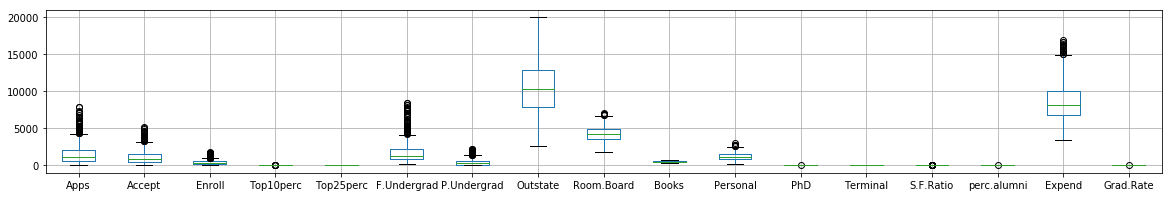

In [81]:
data_df_IQR_remove.boxplot(figsize=(20,3))

In [82]:
#Outlier treatment by replacing quantites above and below IQR with upper bound and lower bound values BEFORE SCALING
data_df_IQR_replace = data_df.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(data_df_IQR_replace < Q1 - 1.5 * IQR)[0], np.where(data_df_IQR_replace < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    data_df_IQR_replace.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(data_df_IQR_replace > Q3 + 1.5 * IQR)[0], np.where(data_df_IQR_replace > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    data_df_IQR_replace.iloc[i,j] = whisker[j]
data_df_IQR_replace.shape 

(777, 17)

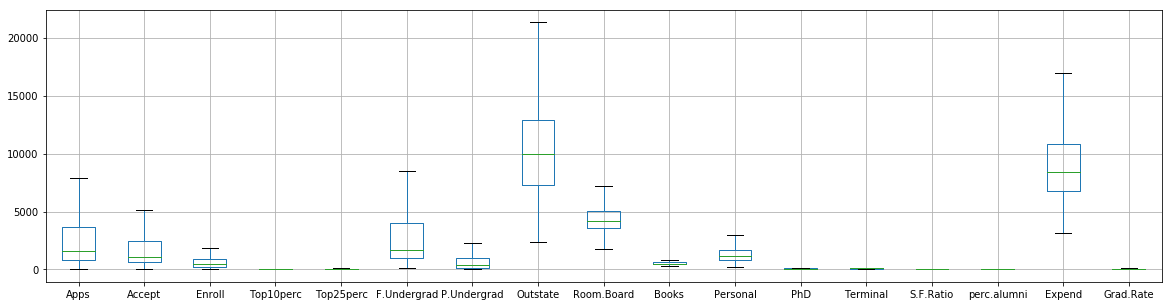

In [94]:
data_df_IQR_replace.boxplot(figsize=(20,5))

In [86]:
#Outlier treatment by removing quantites above and below IQR AFTER SCALING
Q11 = data_new_without_outlier_treatment.quantile(0.25)
Q31 = data_new_without_outlier_treatment.quantile(0.75)
IQR1 = Q31 - Q11
data_df_IQR_remove_after_scaling = data_new_without_outlier_treatment[~((data_new_without_outlier_treatment < (Q11 - 1.5 * IQR1)) |(data_new_without_outlier_treatment > (Q31 + 1.5 * IQR1))).any(axis=1)] # rows without outliers
data_df_IQR_remove_after_scaling.shape, data_df.shape

((538, 17), (777, 17))

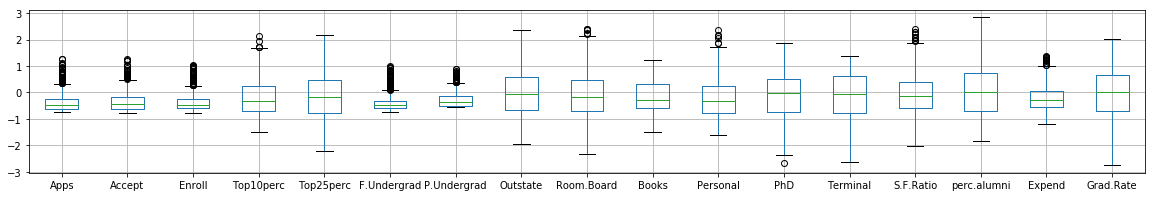

In [87]:
data_df_IQR_remove_after_scaling.boxplot(figsize=(20,3))

In [88]:
#Outlier treatment by replacing quantites above and below IQR with upper bound and lower bound values AFTER SCALING
data_df_IQR_replace_after_scaling = data_new_without_outlier_treatment.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(data_df_IQR_replace_after_scaling < Q11 - 1.5 * IQR1)[0], np.where(data_df_IQR_replace_after_scaling < Q11 - 1.5 * IQR1)[1]): 
    
    whisker  = Q11 - 1.5 * IQR1
    data_df_IQR_replace_after_scaling.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(data_df_IQR_replace_after_scaling > Q31 + 1.5 * IQR1)[0], np.where(data_df_IQR_replace_after_scaling > Q31 + 1.5 * IQR1)[1]):
    
    whisker  = Q31 + 1.5 * IQR1
    data_df_IQR_replace_after_scaling.iloc[i,j] = whisker[j]
data_df_IQR_replace_after_scaling.shape  

(777, 17)

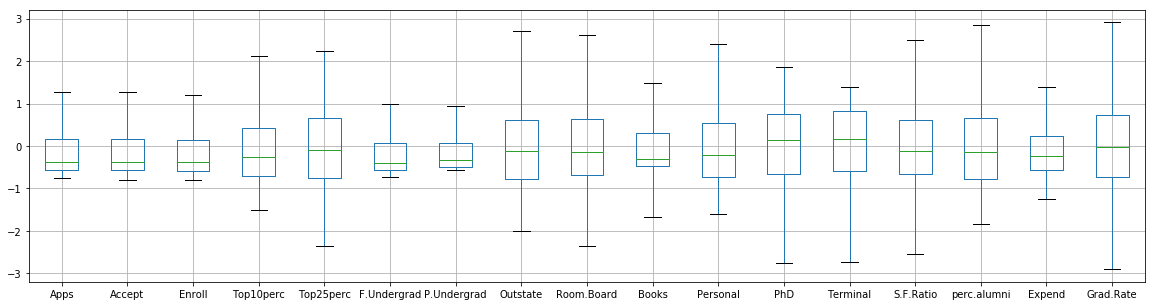

In [97]:
data_df_IQR_replace_after_scaling.boxplot(figsize=(20,5))

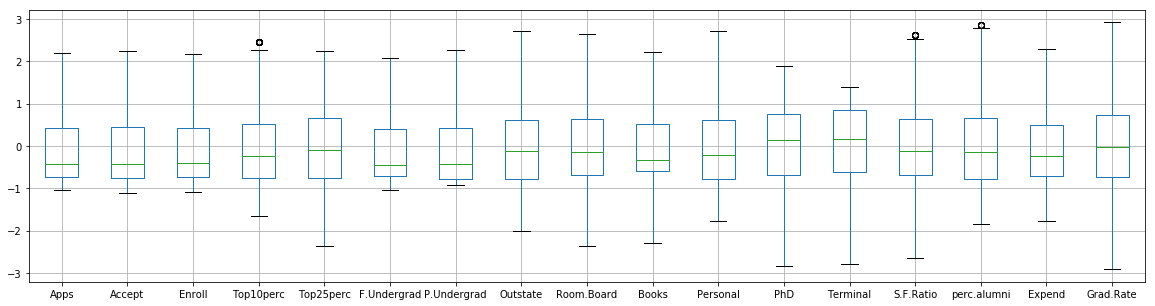

In [95]:
data_new_with_outlier_treatment.boxplot(figsize=(20,5))

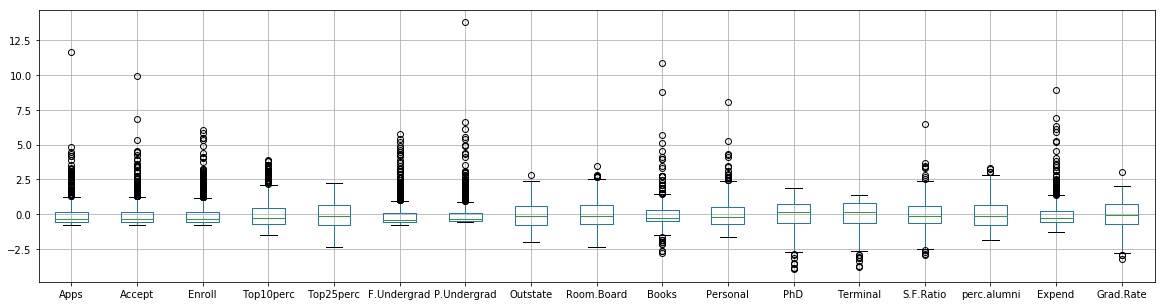

In [96]:
data_new_without_outlier_treatment.boxplot(figsize=(20,5))

In [84]:
# 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.
#Standardization
from scipy.stats import zscore
#Without using outlier treatment
data_new_without_outlier_treatment=data_df.apply(zscore)

#With using outlier treatment
data_new_with_outlier_treatment=data_df_IQR_replace.apply(zscore)

data_new_without_outlier_treatment.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

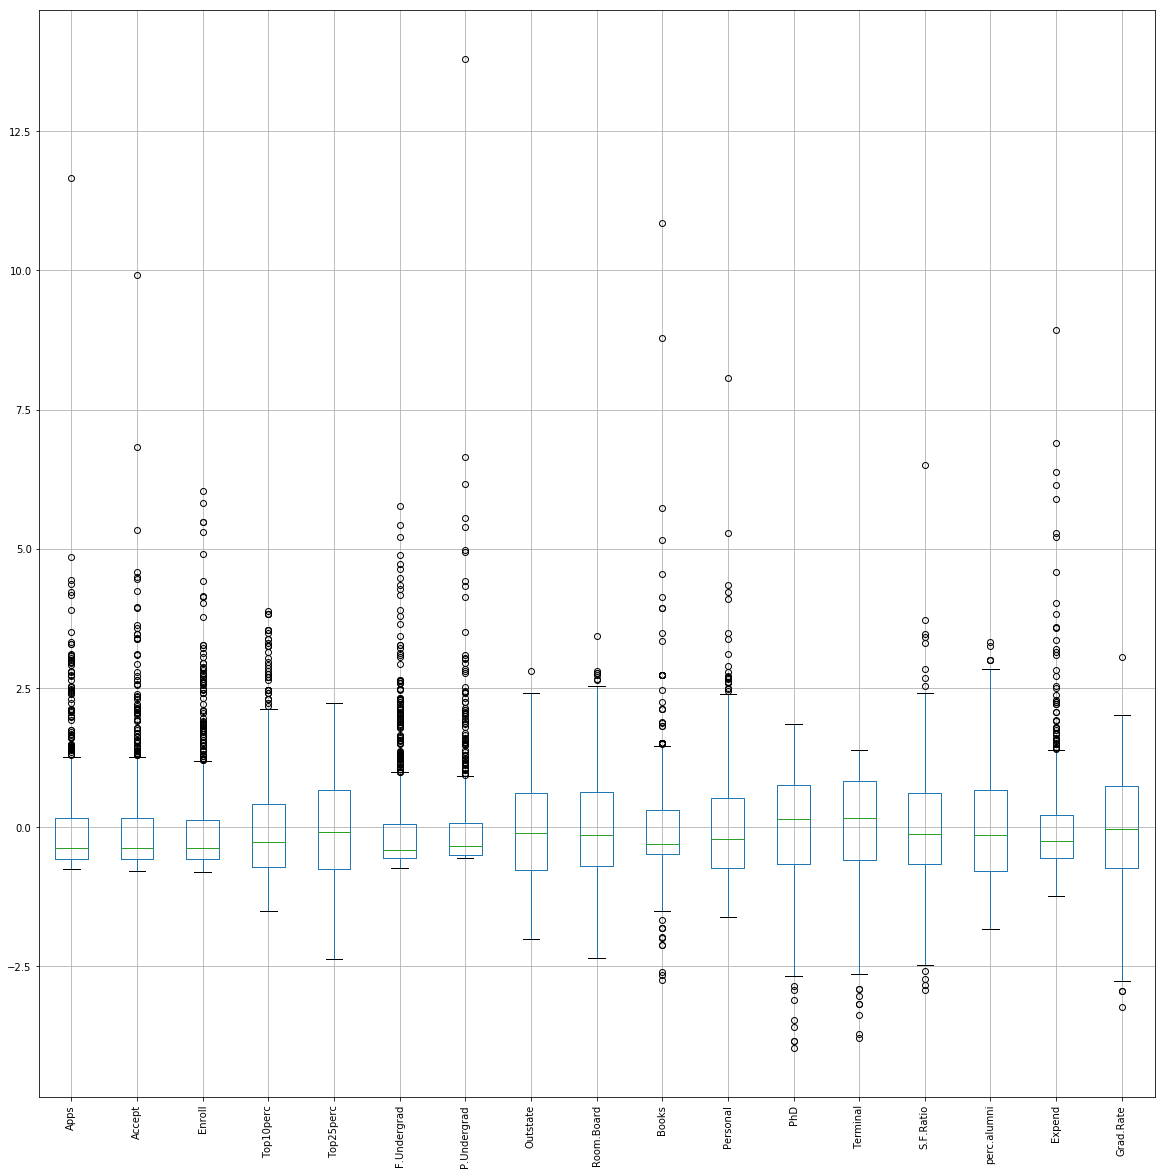

In [90]:
data_new_without_outlier_treatment.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

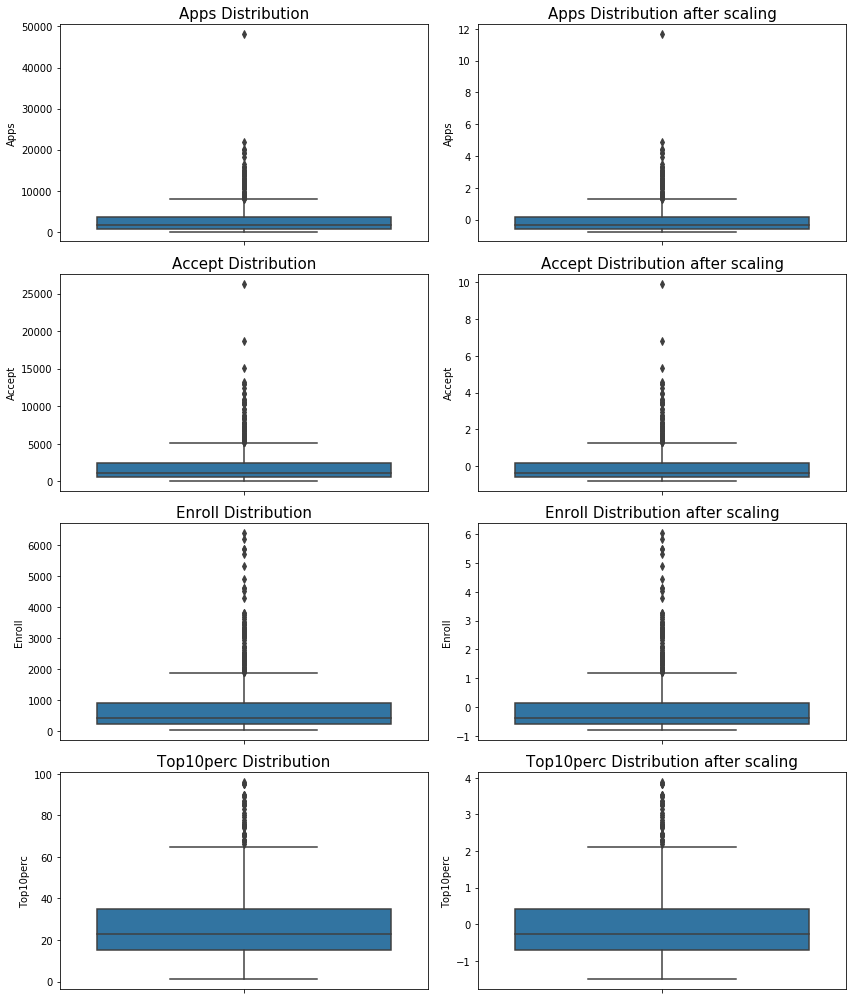

In [75]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.boxplot(data_df['Apps'] , orient = "v" , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Apps'],orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution after scaling",fontsize=15)

a = sns.boxplot(data_df['Accept'] , orient = "v" , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution after scaling",fontsize=15)

a = sns.boxplot(data_df['Enroll'] , orient = "v" , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution after scaling",fontsize=15)


a = sns.boxplot(data_df['Top10perc'], orient = "v" , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution after scaling",fontsize=15)

plt.tight_layout()
plt.show()

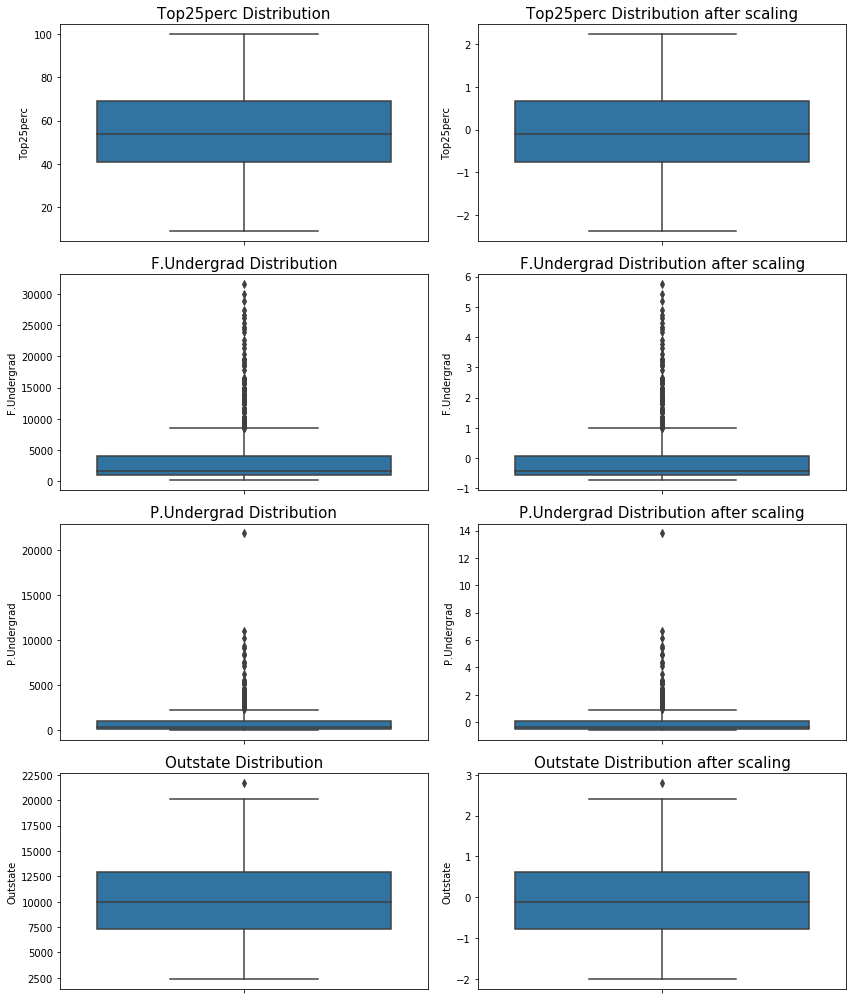

In [76]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.boxplot(data_df['Top25perc'], orient = "v" , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution after scaling",fontsize=15)

a = sns.boxplot(data_df['F.Undergrad'], orient = "v" , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution after scaling",fontsize=15)

a = sns.boxplot(data_df['P.Undergrad'], orient = "v", ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution after scaling",fontsize=15)


a = sns.boxplot(data_df['Outstate'], orient = "v" , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution after scaling",fontsize=15)

plt.tight_layout()
plt.show()

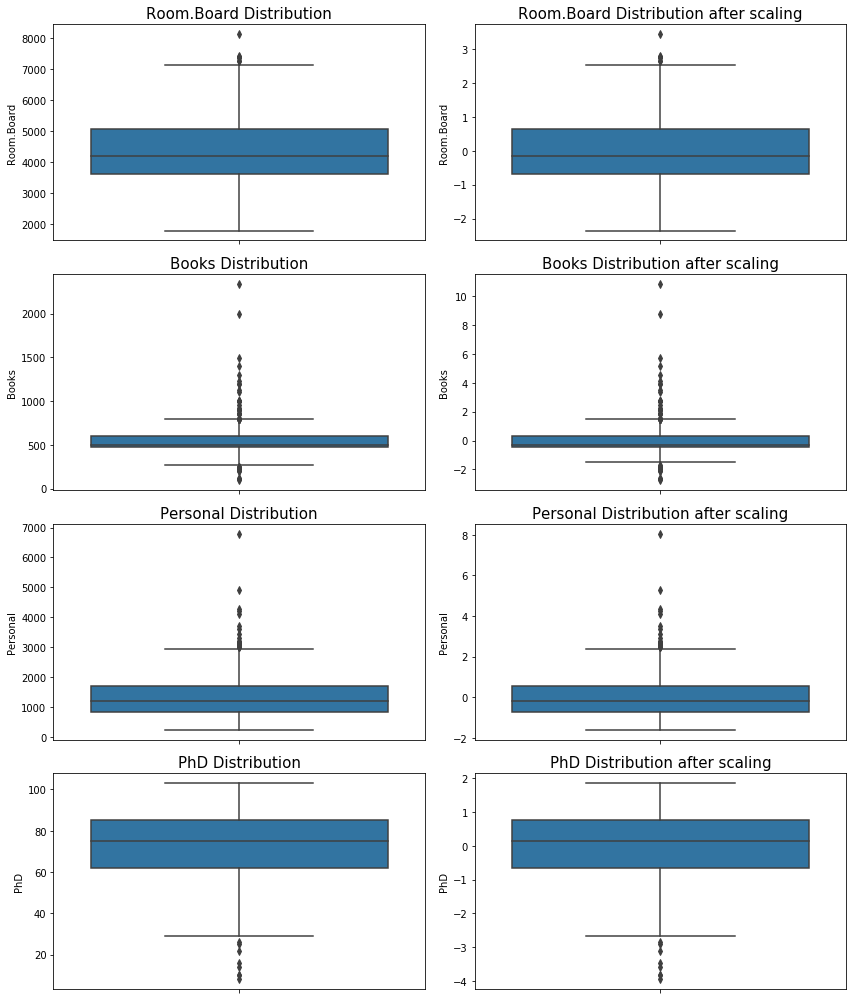

In [77]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.boxplot(data_df['Room.Board'], orient = "v" , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution after scaling",fontsize=15)

a = sns.boxplot(data_df['Books'], orient = "v" , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution after scaling",fontsize=15)

a = sns.boxplot(data_df['Personal'], orient = "v" , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution after scaling",fontsize=15)


a = sns.boxplot(data_df['PhD'], orient = "v" , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution after scaling",fontsize=15)

plt.tight_layout()
plt.show()

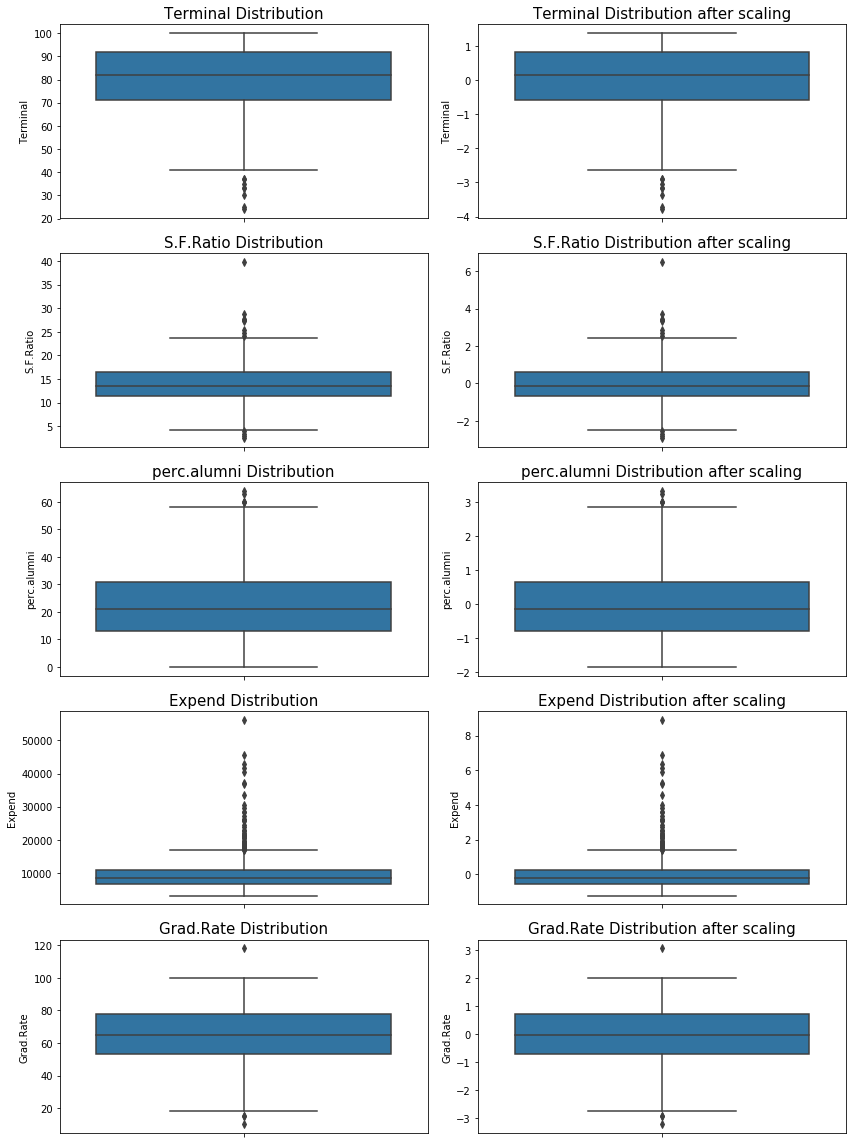

In [78]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 16)
a = sns.boxplot(data_df['Terminal'] , orient = "v" , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution after scaling",fontsize=15)

a = sns.boxplot(data_df['S.F.Ratio'] , orient = "v" , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution after scaling",fontsize=15)

a = sns.boxplot(data_df['perc.alumni'] , orient = "v" , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution after scaling",fontsize=15)


a = sns.boxplot(data_df['Expend'] , orient = "v" , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution after scaling",fontsize=15)

a = sns.boxplot(data_df['Grad.Rate'] , orient = "v" , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=15)
a = sns.boxplot(data_new_without_outlier_treatment['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution after scaling",fontsize=15)

plt.tight_layout()
plt.show()

In [148]:
#PCA
# 2.3) Comment on the comparison between covariance and the correlation matrix.

In [98]:
# PCA
# Step 1 - Create covariance matrix
# Covariance matrix without outlier treatment
cov_matrix_without_outlier_treatment = np.cov(data_new_without_outlier_treatment.T)
print('Covariance Matrix \n%s', cov_matrix_without_outlier_treatment)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [56]:
# Correlation matrix without scaling and without outlier treatment
df_corr_without_scaling_without_outlier_treatment = data_df.copy()
df_corr_without_scaling_without_outlier_treatment.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [50]:
# Correlation matrix with scaling and without outlier treatment (yields same result as without scaling)
df_corr_with_scaling_without_outlier_treatment = data_new_without_outlier_treatment.copy()
df_corr_with_scaling_without_outlier_treatment.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [99]:
# Covariance matrix with outlier treatment
cov_matrix_with_outlier_treatment = np.cov(data_df_IQR_replace_after_scaling.T)
print('Covariance Matrix \n%s', cov_matrix_with_outlier_treatment)

Covariance Matrix 
%s [[ 3.92202587e-01  3.72045278e-01  3.44861102e-01  1.77882547e-01
   2.28413447e-01  3.00372860e-01  1.53261035e-01  4.09309446e-02
   1.16838149e-01  1.03276949e-01  1.29720101e-01  2.84046975e-01
   2.67661215e-01  7.57322866e-02 -6.30526007e-02  9.90236070e-02
   9.43096150e-02]
 [ 3.72045278e-01  3.86719034e-01  3.57101106e-01  1.22742172e-01
   1.70302604e-01  3.10747826e-01  1.67663695e-01 -3.11176328e-03
   7.40055439e-02  9.06387432e-02  1.43597630e-01  2.59812502e-01
   2.46777922e-01  1.12140752e-01 -1.02443762e-01  6.54924734e-02
   4.90474515e-02]
 [ 3.44861102e-01  3.57101106e-01  3.76969419e-01  9.32127566e-02
   1.41572482e-01  3.30838988e-01  1.85453496e-01 -9.55996485e-02
  -1.45695116e-02  8.66382517e-02  1.87681520e-01  2.29023882e-01
   2.14034520e-01  1.61090704e-01 -1.36102632e-01  2.16676723e-02
  -1.42555842e-02]
 [ 1.77882547e-01  1.22742172e-01  9.32127566e-02  7.81305061e-01
   8.08308058e-01  5.47613345e-02 -7.49074558e-02  4.97059995e-

In [58]:
# Correlation matrix without scaling and with outlier treatment
df_corr_without_scaling_with_outlier_treatment = data_df_IQR_replace.copy()
df_corr_without_scaling_with_outlier_treatment.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [59]:
# Correlation matrix with scaling and with outlier treatment (yields same result as without scaling)
df_corr_with_scaling_with_outlier_treatment = data_new_with_outlier_treatment.copy()
df_corr_with_scaling_with_outlier_treatment.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [143]:
# Correlation matrix with original data
df_corr1 = data_df.copy()
df_corr1.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [142]:
# Covariance matrix with original data
cov_matrix1 = np.cov(data_df.T)
print('Covariance Matrix \n%s', cov_matrix1)

Covariance Matrix 
%s [[ 1.49784595e+07  8.94985981e+06  3.04525599e+06  2.31327731e+04
   2.69526635e+04  1.52897025e+07  2.34662015e+06  7.80970356e+05
   7.00072872e+05  8.47037526e+04  4.68346833e+05  2.46894337e+04
   2.10530676e+04  1.46506058e+03 -4.32712238e+03  5.24617110e+06
   9.75642164e+03]
 [ 8.94985981e+06  6.00795970e+06  2.07626776e+06  8.32112487e+03
   1.20134048e+04  1.03935824e+07  1.64666972e+06 -2.53962285e+05
   2.44347147e+05  4.59428079e+04  3.33556631e+05  1.42382015e+04
   1.21820938e+04  1.70983819e+03 -4.85948702e+03  1.59627169e+06
   2.83416292e+03]
 [ 3.04525599e+06  2.07626776e+06  8.63368392e+05  2.97158341e+03
   4.17259244e+03  4.34752988e+06  7.25790674e+05 -5.81188483e+05
  -4.09970592e+04  1.72911997e+04  1.76737970e+05  5.02896117e+03
   4.21708603e+03  8.72684773e+02 -2.08169379e+03  3.11345431e+05
  -3.56587977e+02]
 [ 2.31327731e+04  8.32112487e+03  2.97158341e+03  3.11182456e+02
   3.11630480e+02  1.20891137e+04 -2.82947498e+03  3.99071798e+

In [49]:
eig_vals_without_outlier_treatment, eig_vecs_without_outlier_treatment = np.linalg.eig(cov_matrix_without_outlier_treatment)
print('\n Eigen Values \n %s', eig_vals_without_outlier_treatment)
print('\n')
print('Eigen Vectors \n %s', eig_vecs_without_outlier_treatment)


 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6

In [100]:
eig_vals_with_outlier_treatment, eig_vecs_with_outlier_treatment = np.linalg.eig(cov_matrix_with_outlier_treatment)
print('\n Eigen Values \n %s', eig_vals_with_outlier_treatment)
print('\n')
print('Eigen Vectors \n %s', eig_vecs_with_outlier_treatment)


 Eigen Values 
 %s [4.75579369 2.3800885  0.88497491 0.81453646 0.72423975 0.52688069
 0.47958062 0.41127635 0.36620193 0.23942458 0.00793972 0.01435481
 0.03582106 0.12943793 0.09751277 0.08189987 0.06059116]


Eigen Vectors 
 %s [[ 0.0929684   0.32104652  0.06660652 -0.0129432   0.24674827 -0.00650339
   0.2400326  -0.13180129 -0.01773119 -0.03400089  0.14346037 -0.59269472
   0.5569348   0.03784437  0.22445438  0.11116423 -0.00914552]
 [ 0.06592707  0.3319699   0.07883241 -0.03420729  0.22877472 -0.02487384
   0.27288698 -0.12917757 -0.0195307  -0.06133927 -0.32336365  0.70710813
   0.26755069  0.00907891  0.17576693  0.15058739  0.00281244]
 [ 0.03166929  0.35033549  0.01381154 -0.01122623  0.19114851 -0.03094669
   0.26523924 -0.12023338 -0.00760842 -0.00639234  0.69930928  0.13493584
  -0.49315933 -0.01188448  0.04255122  0.01589244  0.02985794]
 [ 0.33452816  0.06754279 -0.32328505  0.21141739  0.07741651  0.32096376
  -0.09974811  0.02170441  0.13379303 -0.00700079 -0.0310452 

In [101]:
# 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).
eig_vecs_without_outlier_treatment[0]

array([-0.2487656 ,  0.33159823,  0.0630921 , -0.28131053,  0.00574141,
        0.01623744,  0.04248635,  0.1030904 ,  0.09022708, -0.0525098 ,
        0.3589704 , -0.4591395 ,  0.04304621, -0.13340581,  0.0806328 ,
       -0.59583097,  0.02407091])

In [102]:
eig_vals_without_outlier_treatment[0]

5.450521622150289

In [109]:
data_df.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [110]:
# 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.
tot = sum(eig_vals_without_outlier_treatment)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals_without_outlier_treatment, reverse=True)]
var_exp

[32.02062819886915,
 26.34021443611248,
 6.9009165542224995,
 5.922989222926291,
 5.488405110358482,
 4.98470095455744,
 3.5588714917466553,
 3.4536213369992645,
 3.1172336798217217,
 2.3751915258937992,
 1.8414263209386887,
 1.296041400123535,
 0.9857541228001165,
 0.845842335083003,
 0.517125583373192,
 0.2157540100727578,
 0.13528371610095175]

In [117]:
tot/17

1.001288659793814

In [111]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


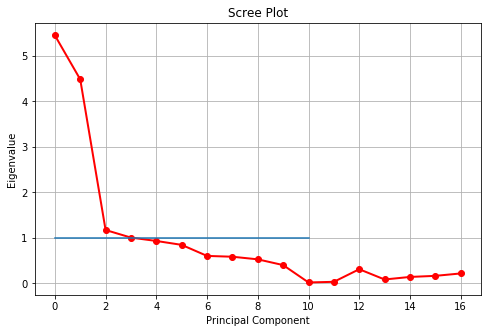

In [114]:
#Scree plot
fig = plt.figure(figsize=(8,5))
sing_vals = range(data_df.shape[1])
plt.plot(sing_vals, eig_vals_without_outlier_treatment, 'ro-', linewidth=2)
plt.plot(range(0,11),np.ones(11))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

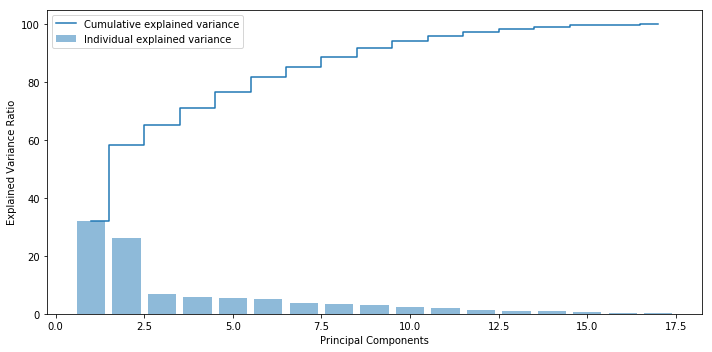

In [116]:
# Plot Cumulative explained variance and individual explained variance vs Principal Components
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals_without_outlier_treatment.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals_without_outlier_treatment.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [139]:
# Use PCA from sklearn's decomposition class and find Principal Components
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(data_new_without_outlier_treatment)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-7.43975398e-01,  1.05999660e+00, -3.69613274e-01, ...,
        -5.16021118e-01, -9.47754745e-01, -1.13217594e+00],
       [-2.98306081e-01, -1.77137309e-01, -9.60591689e-01, ...,
         4.68014248e-01, -2.06993738e+00,  8.39893087e-01],
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00]])

In [120]:
pca.components_.transpose()

array([[ 0.2487656 ,  0.33159823, -0.0630921 ,  0.28131053,  0.00574141,
        -0.01623744],
       [ 0.2076015 ,  0.37211675, -0.10124906,  0.26781735,  0.05578609,
         0.00753468],
       [ 0.17630359,  0.40372425, -0.08298557,  0.16182677, -0.05569364,
        -0.04255798],
       [ 0.35427395, -0.08241182,  0.03505553, -0.05154725, -0.39543434,
        -0.0526928 ],
       [ 0.34400128, -0.04477866, -0.02414794, -0.10976654, -0.42653359,
         0.03309159],
       [ 0.15464096,  0.41767377, -0.06139298,  0.10041233, -0.04345436,
        -0.04345424],
       [ 0.0264425 ,  0.31508783,  0.13968172, -0.15855849,  0.30238541,
        -0.19119858],
       [ 0.29473642, -0.24964352,  0.04659887,  0.13129136,  0.222532  ,
        -0.03000039],
       [ 0.24903045, -0.13780888,  0.14896739,  0.18499599,  0.56091947,
         0.16275545],
       [ 0.06475752,  0.05634184,  0.67741165,  0.08708922, -0.12728883,
         0.64105495],
       [-0.04252854,  0.21992922,  0.49972112, -0.

In [121]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701])

In [140]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2])

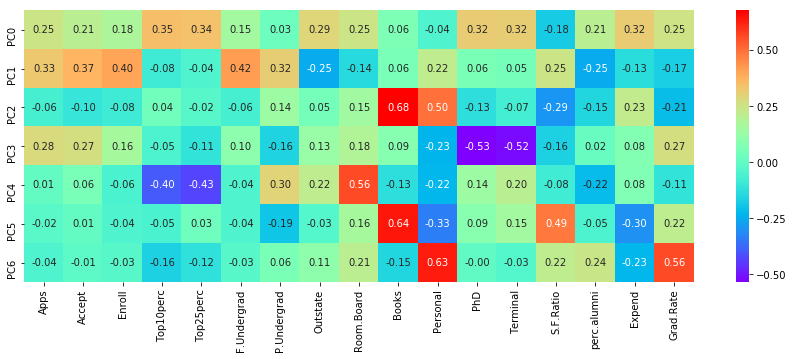

In [141]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
plt.figure(figsize=(15,5))
sns.heatmap(df_comp,cmap='rainbow',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3', 'PC4', 'PC5', 'PC6'])
plt.show()

In [129]:
principal_components_Df = pd.DataFrame(data = data_reduced
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])

In [132]:
principal_components_Df.shape

(777, 7)

In [134]:
principal_components_Df.head()

principal component 1  principal component 2  principal component 3  \
0              -1.592855               0.767334              -0.101074   
1              -2.192402              -0.578830               2.278798   
2              -1.430964              -1.092819              -0.438093   
3               2.855557              -2.630612               0.141722   
4              -2.212008               0.021631               2.387030   

   principal component 4  principal component 5  principal component 6  \
0              -0.921749              -0.743975              -0.298306   
1               3.588918               1.059997              -0.177137   
2               0.677241              -0.369613              -0.960592   
3              -1.295486              -0.183837              -1.059508   
4              -1.114538               0.684451               0.004918   

   principal component 7  
0               0.638443  
1               0.236753  
2              -0.248276  
3              -1.249356  
4              -2.159220